### Health Care.

#### DESCRIPTION

- Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


- Variable	Description
- Age	Age in years
- Sex	1 = male; 0 = female
- cp|	Chest pain type
- trestbps	Resting blood pressure (in mm Hg on admission to the hospital)
- chol	Serum cholesterol in mg/dl
- fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg	Resting electrocardiographic results
- thalach	Maximum heart rate achieved
- exang	Exercise induced angina (1 = yes; 0 = no)
- oldpeak	ST depression induced by exercise relative to rest
- slope	Slope of the peak exercise ST segment
- ca	Number of major vessels (0-3) colored by fluoroscopy
- thal	3 = normal; 6 = fixed defect; 7 = reversible defect
- Target	1 or 0


**Perform the following steps:**
1.	Preliminary Analysis:

> a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

> b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

> a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

> b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

> c.	Study the occurrence of CVD across the Age category

> d.	Study the composition of all patients with respect to the Sex category

> e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

> f.	Describe the relationship between cholesterol levels and a target variable

> g.	State what relationship exists between peak exercising and the occurrence of a heart attack

> h.	Check if thalassemia is a major cause of CVD

> i.	List how the other factors determine the occurrence of CVD

> j.	Use a pair plot to understand the relationship between all the given variables

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [1]:
#Import the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the dataset
dataset= pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
#Shape of dataset
dataset.shape

(1025, 14)

In [5]:
#Printing out a first few columns
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#How many class of one feature or target
dataset["target"].value_counts() #balanced data

1    526
0    499
Name: target, dtype: int64

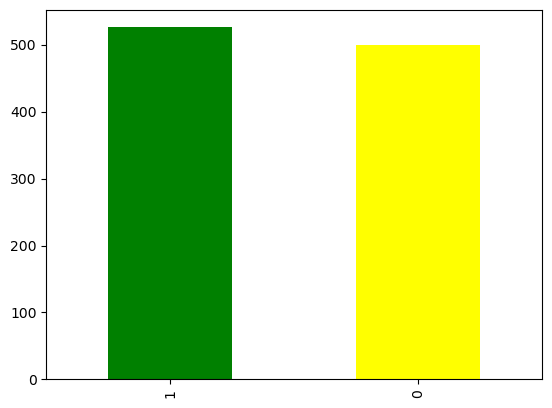

In [7]:
#Plotting the same
#Bar chart
dataset['target'].value_counts().plot(kind='bar', color=['green','yellow'])
plt.show()

In [8]:
#info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#checking for missing values
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#We have 526 person with heart disease and 499 person without heart disease, 
#so our dataset is balanced

In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#checking correlation between columns
#we are doing here bi-variate analysis
print(dataset.corr()['target'].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [13]:
#Heart Disease Frequency according to sex
dataset.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
#Creating contingency table to compare sex with target
pd.crosstab(dataset.target, dataset.sex)

sex,0,1
target,,
0,86,413
1,226,300


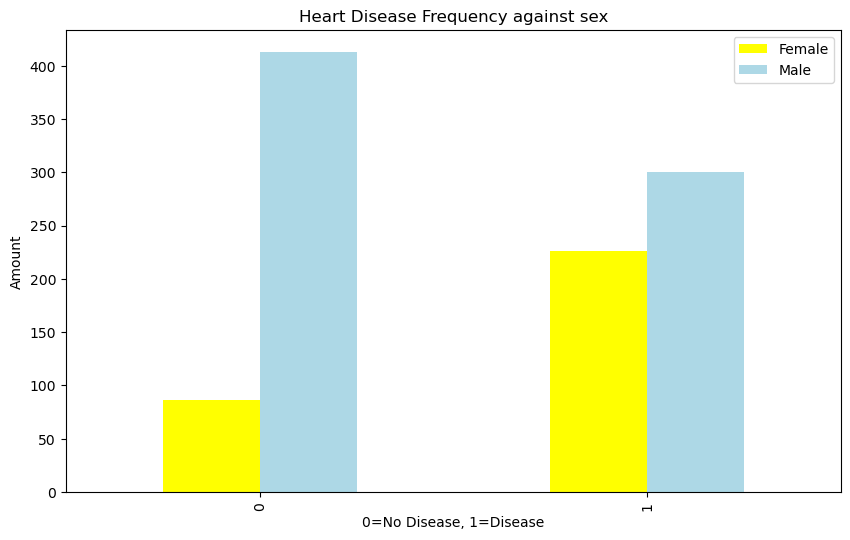

In [15]:
#Create plot of heart disease against sex
pd.crosstab(dataset.target, dataset.sex).plot(kind='bar',figsize=(10,6),color=['yellow','lightblue'])
plt.title('Heart Disease Frequency against sex')
plt.xlabel('0=No Disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.show()

In [16]:
#Heart Disease Frequency vs Chest pain
#Chest pain type
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest apin not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease

In [17]:
#creating crosstab
pd.crosstab(dataset.cp,dataset.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


In [18]:
#Analysing the 'chest Pain Type' feature
#Chest pain type
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest apin not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease
dataset['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

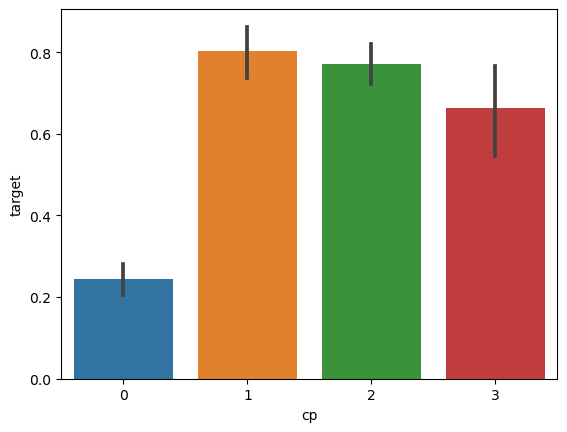

In [19]:
#
sns.barplot(x=dataset['cp'],y=dataset['target'])
plt.show()

In [20]:
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less 
#likely to have heart problems

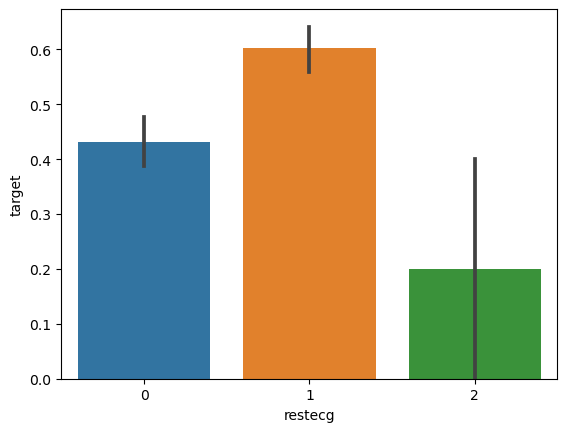

In [21]:
#Analysing the restecg feature
dataset['restecg'].unique()

sns.barplot(x=dataset['restecg'],y=dataset['target'])
plt.show()

#### We will continue exploring other pairwise relationships ------- continue exploring

### Data Processing

#### We need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. We will use the get_dummies method to create dummy columns for categorical variables.

In [22]:
#
pd.set_option('display.float', '{:.2f}'.format)

In [23]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [24]:
#segregrating the categorical variables and continuous ones
categorical_val = []
continuous_val = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [25]:
#include=np.number
#exclude = np.number

In [26]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
categorical_val.remove('target')
dataset = pd.get_dummies(dataset,columns = categorical_val)
#When we dealing with categorical variable then we to create dummies

In [28]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.10,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.60,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.00,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.90,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
#Standarlizing the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_columns = ['age','trestbps','chol','thalach','oldpeak']
dataset[scaled_columns] = scale.fit_transform(dataset[scaled_columns])

In [30]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.16,0.48,-0.83,0.26,1.73,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.72,0.76,-1.40,-1.05,1.30,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.72,0.94,-0.83,0.52,-0.91,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.83,0.36,0.93,-1.87,0.71,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split

predictors = dataset.drop('target',axis=1)
target = dataset['target']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [32]:
X_train.shape

(820, 30)

In [33]:
X_test.shape

(205, 30)

In [34]:
Y_train.shape

(820,)

In [35]:
Y_test.shape

(205,)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
#XG Boost
#pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [38]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print('The accuracy score achieved using XGBoost is: '+str(score_xgb)+' %')

The accuracy score achieved using XGBoost is: 100.0 %


In [39]:
#You can use AdaBoost, SVM, CatBoost algorithm as well